In [1]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6.5, 5]

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.labelsize'] = 30
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["lines.linewidth"] = 3

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['ytick.minor.visible'] =  True


plt.rcParams['legend.fontsize'] = 25
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.bbox'] = 'tight'

matplotlib.rc('font', weight='bold')

# Throw darts randomly to get $\pi$ ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.random((5, 2))

array([[0.12834176, 0.08410488],
       [0.48806689, 0.75569098],
       [0.43261228, 0.75139783],
       [0.26589026, 0.07964802],
       [0.28487311, 0.64426011]])

In [4]:
darts = np.random.random((100,2))

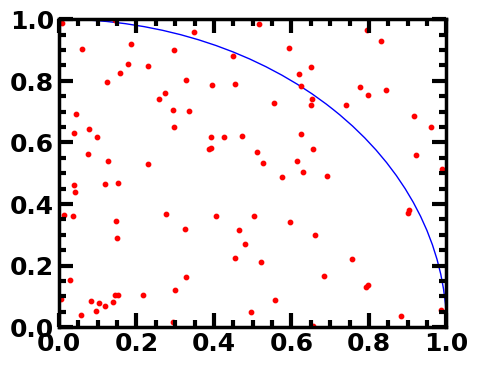

In [5]:
fig = plt.figure(figsize=(5,4))
ax = fig.gca()
ax.set_xlim([0,1])
ax.set_ylim([0,1])
circle = plt.Circle((0, 0), 1.0, color='b', fill=False)
ax.add_artist(circle)
plt.scatter(darts[:,0],darts[:,1],s=10,color='r')

In [6]:
NSamples = 100000
darts = np.random.random((NSamples,2))

pi = []

inside  = 0
count = 0

for dart in darts:
    count += 1
    if np.linalg.norm(dart) < 1:
        inside += 1
    pi.append(4*(inside/count))

In [7]:
pi[-1]

3.13968

In [8]:
import math
math.pi

3.141592653589793

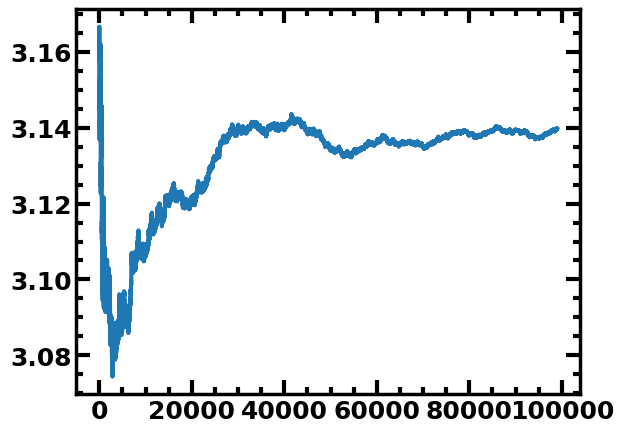

In [9]:
plt.plot(pi[1000:])

# Integration by random sampling ...

$$f(x) = x$$
$$\int_0^2 f(x) dx = 2$$

In [10]:
avfx = 0
NSample = 100000
xmax = 2
xmin = 0
for i in range(NSample):
    x = 2*np.random.random()
    avfx += x # f(x)
print(f"Result = {(xmax - xmin) * avfx/NSample}")

Result = 2.0021922035540265


# Monte Carlo sampling (Importance Sampling) using Metropolis algorithm ...

$$V(x) = \frac{1}{2} k x^2$$

$$
\langle V \rangle = 
\frac{\int_{-\infty}^{\infty} V(x)\, e^{-\beta V(x)} \, dx}{Q} 
= \frac{\int_{-\infty}^{\infty} V(x)\, e^{-\beta V(x)} \, dx}{\int_{-\infty}^{\infty} e^{-\beta V(x)} \, dx} 
= \frac{1}{2\beta} 
= \tfrac{1}{2} k_B T
$$

$$
\langle V \rangle = 
\frac{\int_{-\infty}^{\infty} V(x)\, e^{-\beta V(x)} \, dx}{Q} 
= \frac{\int_{-\infty}^{\infty} V(x)\, e^{-\beta V(x)} \, dx}{\int_{-\infty}^{\infty} e^{-\beta V(x)} \, dx} 
= \frac{1}{2\beta} 
= \tfrac{1}{2} k_B T
$$


In [11]:
def V(x, k=1):
    return 0.5*k*x**2

In [12]:
NSteps = 10000
MAXL = 1
BETA = 1
coord = np.zeros(NSteps+1)
nrg = np.zeros(NSteps+1)

In [13]:
# x0 = 10
coord[0] = 10
nrg[0] = V(coord[0])
xold = coord[0]
nrgold = nrg[0]

In [14]:
# Metropolis Monte Carlo
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL)
    xnew = xold + dx
    nrgnew = V(xnew)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY BACK !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

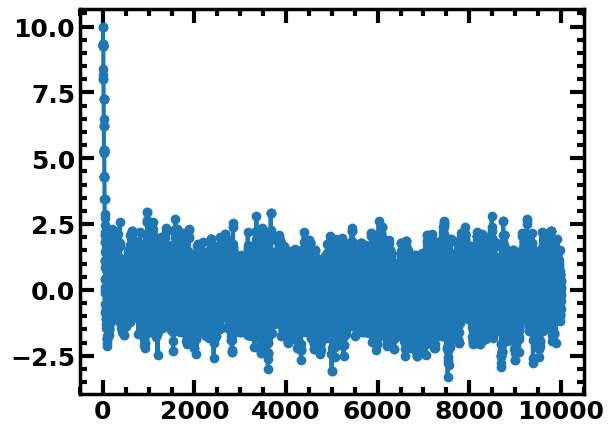

In [15]:
# Position with MC steps

plt.plot(coord,'-o')

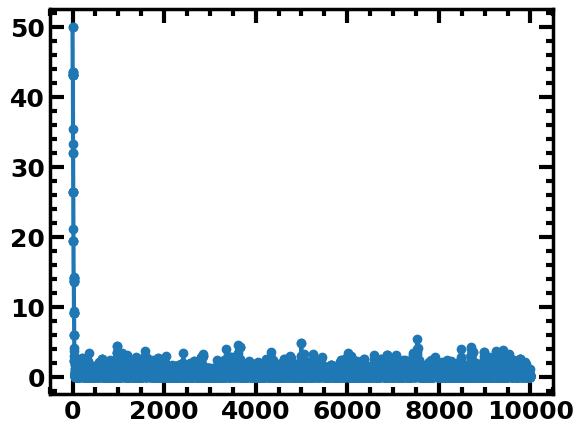

In [16]:
# Potential energy with MC steps

plt.plot(nrg, 'o-')

In [17]:
nrg.mean()

0.5393886132417578

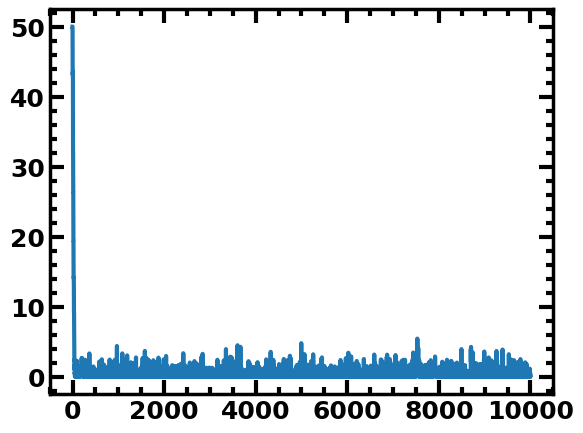

In [18]:
plt.plot(nrg)

In [19]:
# Skipping first 20 frames from average energy ...
nrg[20:].mean()

0.46789113970624663

# Probability distribution / Histogram 
$$
P(x) = \frac{e^{-\beta V(x)}}{Q} 
= \frac{e^{-\beta \tfrac{k}{2} x^2}}{Q} 
= \frac{e^{-x^2/2}}{\sqrt{2\pi}}
$$


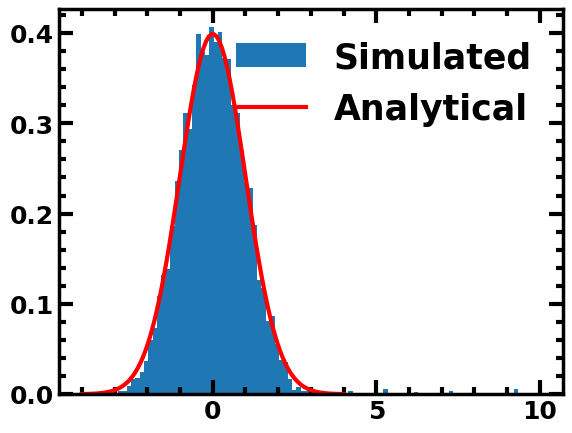

In [20]:
x = np.linspace(-4,4,100)
px = np.exp(-x**2 / 2)/np.sqrt(2*np.pi)
# Notice that I am using a smaller part of the trajectory to compute histogram
# to show that poor statistics can lead to bad match ... increase size to see convergence ...
# plt.hist(coord[100:1000], bins=100, density=True, label='Simulated')
plt.hist(coord, bins=100, density=True, label='Simulated')
plt.plot(x, px, 'r-', label="Analytical")
plt.legend()
plt.show()

In [21]:
# Analytically estimated height of the distribution ... P(0)
1/(2*np.pi)**0.5

0.3989422804014327

# Monte Carlo (MC) for 2D Harmonic Oscillator

$$V(x,y) = \frac{1}{2} (k_x x^2 + k_y y^2) $$

In [22]:
def V(pos, kx=1, ky=1):
    return 0.5*(kx*pos[0]**2 + ky*pos[1]**2)

In [23]:
MAXL = 1
BETA = 1
kx = 3
ky = 1

NSteps = 1000
coord = np.zeros((NSteps+1,2))
nrg = np.zeros(NSteps+1)

# (x0, y0) = (8, 8)
coord[0] = [8, 8]
nrg[0] = V(coord[0], kx, ky)
xold = coord[0]
nrgold = nrg[0]

In [24]:
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL, 2)
    xnew = xold + dx
    nrgnew = V(xnew, kx, ky)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

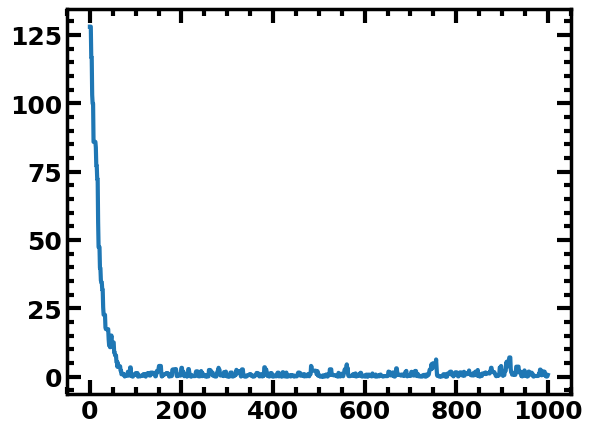

In [25]:
plt.plot(nrg)

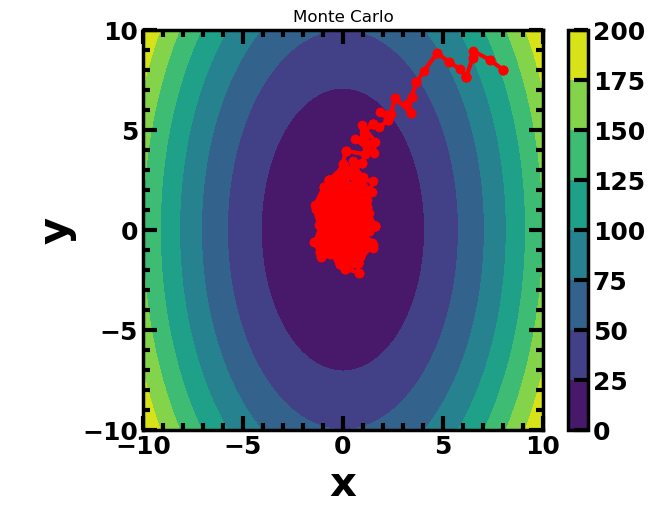

In [26]:
# Plotting starts here ...
fig = plt.figure(figsize=(5,4))
left, bottom, width, height = 0.0, 0.0, 1.0, 1.0
ax = fig.add_axes([left, bottom, width, height])

start, stop, n_values = -10, 10, 1000

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = 0.5*(kx*X**2 + ky*Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Monte Carlo')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.plot(coord[:,0],coord[:,1],"ro-")
plt.show()